In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

# Import Data

In [3]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv', sep=';')
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,1,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,1.0
1,119250,40.0,Men,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,0.0
2,119372,49.0,1,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,0.0
3,132514,43.0,1,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,1.0
4,146211,31.0,Male,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,1.0


# DATA PRE-PROCESSING

# Identifikasi Missing Value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                998 non-null    float64
 2   gender             998 non-null    object 
 3   chestpain          998 non-null    float64
 4   restingBP          998 non-null    float64
 5   serumcholestrol    996 non-null    float64
 6   fastingbloodsugar  998 non-null    float64
 7   restingelectro     998 non-null    float64
 8   maxheartrate       998 non-null    float64
 9   exerciseangia      998 non-null    float64
 10  oldpeak            998 non-null    float64
 11  slope              998 non-null    float64
 12  noofmajorvessels   998 non-null    float64
 13  target             998 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 109.5+ KB


In [5]:
data.isna().sum()
#Terdapat beberapa missing value dalam data

patientid            0
age                  2
gender               2
chestpain            2
restingBP            2
serumcholestrol      4
fastingbloodsugar    2
restingelectro       2
maxheartrate         2
exerciseangia        2
oldpeak              2
slope                2
noofmajorvessels     2
target               2
dtype: int64

# Remove Data yang Duplicate

In [6]:
data = data.drop_duplicates()
data
#update data yang sudah tidak ada duplicate

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,1,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,1.0
1,119250,40.0,Men,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,0.0
2,119372,49.0,1,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,0.0
3,132514,43.0,1,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,1.0
4,146211,31.0,Male,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48.0,1,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0,1.0
996,9953423,47.0,1,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0,0.0
997,9965859,69.0,1,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0,1.0
998,9988507,45.0,1,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          998 non-null    int64  
 1   age                996 non-null    float64
 2   gender             996 non-null    object 
 3   chestpain          996 non-null    float64
 4   restingBP          996 non-null    float64
 5   serumcholestrol    994 non-null    float64
 6   fastingbloodsugar  996 non-null    float64
 7   restingelectro     996 non-null    float64
 8   maxheartrate       996 non-null    float64
 9   exerciseangia      996 non-null    float64
 10  oldpeak            996 non-null    float64
 11  slope              996 non-null    float64
 12  noofmajorvessels   996 non-null    float64
 13  target             996 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 117.0+ KB


# Variabel Numerik
- age
- restingBP
- serumcholestrol
- maxheartrate
- oldpeak
- noofmajorvessels

Untuk mengisi nilai missing value dalam variabel numerik dapat diisi dengan nilai mean (jika tidak terdapat outlier) ataupun nilai median (jika terdapat outlier). Maka dari itu, kami lakukan deteksi outlier untuk setiap variabel numerik yaitu sebagai berikut:  

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1bcbc610>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1bcedf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1bcdf650>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1bcef6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1bcf8110>],
 'means': []}

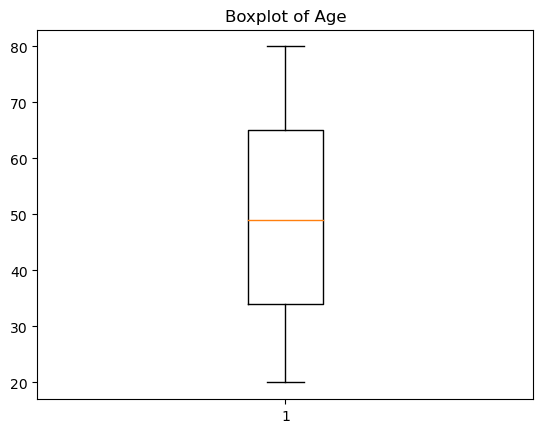

In [8]:
#Deteksi Outlier pada Variabel Age
fig, ax = plt.subplots()
ax.set_title ('Boxplot of Age')
ax.boxplot(data["age"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1bdb6710>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1bdc0050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1bdb5b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1bdc1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1bd1fed0>],
 'means': []}

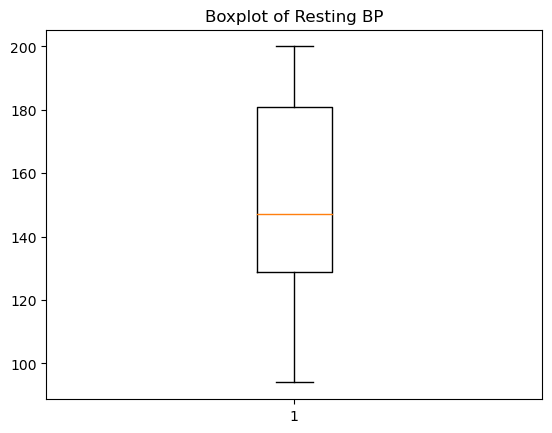

In [9]:
#Deteksi Outlier pada Variabel Resting BP
fig, ax = plt.subplots()
ax.set_title ('Boxplot of Resting BP')
ax.boxplot(data["restingBP"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1be20750>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1be21dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1be17b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1be23410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1be23e50>],
 'means': []}

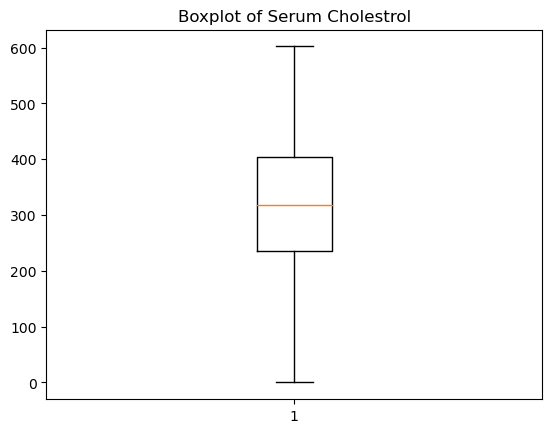

In [10]:
#Deteksi Outlier pada Variabel Serum Cholestrol
fig, ax = plt.subplots()
ax.set_title ('Boxplot of Serum Cholestrol')
ax.boxplot(data["serumcholestrol"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1be85950>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1be87210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1be84cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1be987d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1be991d0>],
 'means': []}

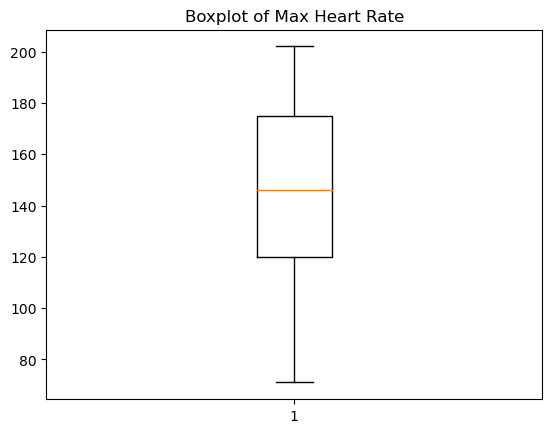

In [11]:
#Deteksi Outlier pada Variabel Max Heart Rate
fig, ax = plt.subplots()
ax.set_title ('Boxplot of Max Heart Rate')
ax.boxplot(data["maxheartrate"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1c5ca090>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1c5e8950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1c588c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1c5e9e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1bd28b90>],
 'means': []}

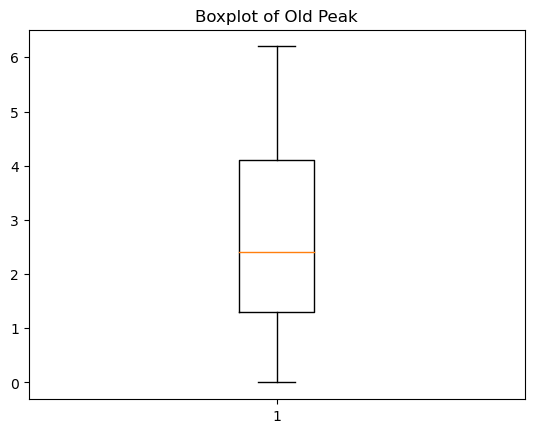

In [12]:
#Deteksi Outlier pada Variabel Old Peak
fig, ax = plt.subplots()
ax.set_title ('Boxplot of Old Peak')
ax.boxplot(data["oldpeak"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff1c64c350>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff1c64db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff1c6437d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff1c64f210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff1c62a5d0>],
 'means': []}

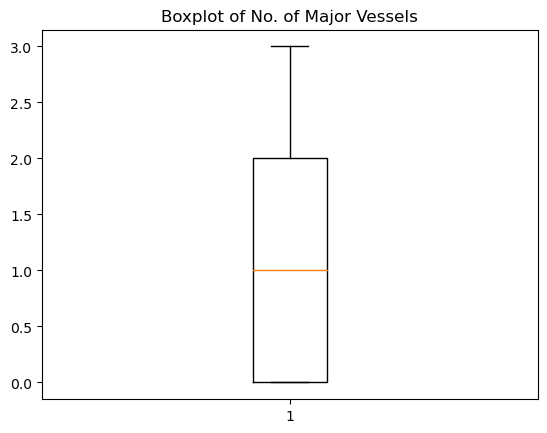

In [13]:
#Deteksi Outlier pada Variabel No. of Major Vessels
fig, ax = plt.subplots()
ax.set_title ('Boxplot of No. of Major Vessels')
ax.boxplot(data["noofmajorvessels"].dropna())

Dari boxplot di atas menunjukkan bahwa dalam pada setiap variabel numerik di dataset ini tidak terdapat outlier. Sehingga untuk menggantikan missing value variabel numerik dengan nilai mean dapat dilakukan dengan cara :

1. mencari nilai mean -> data['variabelnumeric'].mean()
2. input nilai mean ke dalam missing value -> data['variabelnumeric'] = data['variabelnumeric'].fillna('nilaimean')

atau langsung dengan cara:

data['variabelnumeric'] = data['variabelnumeric'].fillna(data['variabelnumeric'].mean())


In [14]:
data['age'] = data['age'].fillna(round(data['age'].mean())) 
#gunakan round agar nilai yang diganti sudah dibulatkan 
data['age']

0      53.0
1      40.0
2      49.0
3      43.0
4      31.0
       ... 
995    48.0
996    47.0
997    69.0
998    45.0
999    25.0
Name: age, Length: 998, dtype: float64

In [15]:
data['restingBP'] = data['restingBP'].fillna(round(data['restingBP'].mean()))
data['restingBP']

0      171.0
1       94.0
2      133.0
3      138.0
4      199.0
       ...  
995    139.0
996    143.0
997    156.0
998    186.0
999    158.0
Name: restingBP, Length: 998, dtype: float64

In [16]:
data['serumcholestrol'] = data['serumcholestrol'].fillna(round(data['serumcholestrol'].mean()))
data['serumcholestrol']

0        0.0
1      229.0
2      142.0
3      295.0
4        0.0
       ...  
995    349.0
996    258.0
997    434.0
998    417.0
999    270.0
Name: serumcholestrol, Length: 998, dtype: float64

In [17]:
data['maxheartrate'] = data['maxheartrate'].fillna(round(data['maxheartrate'].mean()))
data['maxheartrate']

0      147.0
1      115.0
2      202.0
3      153.0
4      136.0
       ...  
995    183.0
996     98.0
997    196.0
998    117.0
999    143.0
Name: maxheartrate, Length: 998, dtype: float64

In [18]:
data['oldpeak'] = data['oldpeak'].fillna(round(data['oldpeak'].mean()))
data['oldpeak']

0      5.3
1      3.7
2      5.0
3      3.2
4      5.3
      ... 
995    5.6
996    5.7
997    1.4
998    5.9
999    4.7
Name: oldpeak, Length: 998, dtype: float64

In [19]:
data['noofmajorvessels'] = data['noofmajorvessels'].fillna(round(data['noofmajorvessels'].mean()))
data['noofmajorvessels']

0      3.0
1      1.0
2      0.0
3      2.0
4      2.0
      ... 
995    2.0
996    0.0
997    1.0
998    2.0
999    0.0
Name: noofmajorvessels, Length: 998, dtype: float64

# Variabel Kategorik
- gender
- chestpain
- fastingbloodsugar
- restingrelectro
- exerciseangia
- slope
- target

Pada bagian ini, kami mencari tahu apakah terdapat data yang tidak konsisten pada setiap variabel kategorik dengan menggunakan value_counts(). 

In [20]:
data['gender'].value_counts()
#terdapat data yang tidak konsisten

1         760
0         230
Men         2
Male        1
female      1
Female      1
Women       1
Name: gender, dtype: int64

In [21]:
data['chestpain'].value_counts()

0.0    416
2.0    312
1.0    224
3.0     44
Name: chestpain, dtype: int64

In [22]:
data['fastingbloodsugar'].value_counts()

0.0    702
1.0    294
Name: fastingbloodsugar, dtype: int64

In [23]:
data['restingelectro'].value_counts()

0.0    452
1.0    343
2.0    201
Name: restingelectro, dtype: int64

In [24]:
data['exerciseangia'].value_counts()

0.0    499
1.0    497
Name: exerciseangia, dtype: int64

In [25]:
data['slope'].value_counts()

2.0    320
1.0    298
3.0    199
0.0    179
Name: slope, dtype: int64

In [26]:
data['target'].value_counts()

1.0    580
0.0    416
Name: target, dtype: int64

Kami mendapatkan bahwa hanya variabel gender saja yang memiliki data tidak konsisten sehingga kami lakukan proses sebagai berikut.

In [27]:
data = data.replace({'gender': {'1' : 'Male', '0' : 'Female', 'Men' : 'Male', 'female' : 'Female' , 'Women' : 'Female' }})
data
#replace data yang tidak konsisten dan pakai 1 variabel yang sama

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,Male,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,1.0
1,119250,40.0,Male,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,0.0
2,119372,49.0,Male,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,0.0
3,132514,43.0,Male,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,1.0
4,146211,31.0,Male,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48.0,Male,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0,1.0
996,9953423,47.0,Male,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0,0.0
997,9965859,69.0,Male,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0,1.0
998,9988507,45.0,Male,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0,1.0


In [28]:
data['gender'].value_counts()
#untuk memeriksa kembali apakah masih terdapat data yang tidak konsisten

Male      763
Female    233
Name: gender, dtype: int64

Selanjutnya, kami akan mengisi missing value untuk variabel kategorik lainnya dengan nilai modus.

In [29]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.head(20)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,Male,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,1.0
1,119250,40.0,Male,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,0.0
2,119372,49.0,Male,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,0.0
3,132514,43.0,Male,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,1.0
4,146211,31.0,Male,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,1.0
5,148462,24.0,Male,1.0,173.0,0.0,0.0,0.0,161.0,0.0,4.7,3.0,2.0,1.0
6,168686,79.0,Male,2.0,130.0,240.0,0.0,2.0,157.0,0.0,2.5,2.0,1.0,1.0
7,170498,52.0,Male,0.0,127.0,345.0,0.0,0.0,192.0,1.0,4.9,1.0,0.0,1.0
8,188225,62.0,Male,0.0,121.0,357.0,0.0,1.0,138.0,0.0,2.8,0.0,1.0,0.0
9,192523,61.0,Female,0.0,190.0,181.0,0.0,1.0,150.0,0.0,2.9,2.0,0.0,1.0


# Hasil Data Pre-Processing

In [30]:
data.head(40)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,Male,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,1.0
1,119250,40.0,Male,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,0.0
2,119372,49.0,Male,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,0.0
3,132514,43.0,Male,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,1.0
4,146211,31.0,Male,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,1.0
5,148462,24.0,Male,1.0,173.0,0.0,0.0,0.0,161.0,0.0,4.7,3.0,2.0,1.0
6,168686,79.0,Male,2.0,130.0,240.0,0.0,2.0,157.0,0.0,2.5,2.0,1.0,1.0
7,170498,52.0,Male,0.0,127.0,345.0,0.0,0.0,192.0,1.0,4.9,1.0,0.0,1.0
8,188225,62.0,Male,0.0,121.0,357.0,0.0,1.0,138.0,0.0,2.8,0.0,1.0,0.0
9,192523,61.0,Female,0.0,190.0,181.0,0.0,1.0,150.0,0.0,2.9,2.0,0.0,1.0


# DATA EXPLORATION

Di sini kami mengumpulkan variabel yang bersifat numerik agar tidak terganggu dengan variabel kategorik yang data-nya dilambangkan dengan angka (nominal). 

In [31]:
data_numeric = data[['age','restingBP','serumcholestrol','maxheartrate','oldpeak','noofmajorvessels']]
data_numeric.head()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
0,53.0,171.0,0.0,147.0,5.3,3.0
1,40.0,94.0,229.0,115.0,3.7,1.0
2,49.0,133.0,142.0,202.0,5.0,0.0
3,43.0,138.0,295.0,153.0,3.2,2.0
4,31.0,199.0,0.0,136.0,5.3,2.0


In [32]:
data_numeric.describe()
#untuk mengetahui statistik deskriptif pada setiap variabel numerik

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,49.281563,151.687375,311.846693,145.559118,2.704709,1.222445
std,17.860371,29.910238,132.101909,34.074260,1.719727,0.975434
min,20.000000,94.000000,0.000000,71.000000,0.000000,0.000000
25%,34.000000,129.000000,237.000000,120.000000,1.300000,0.000000
50%,49.000000,147.000000,317.000000,146.000000,2.400000,1.000000
75%,64.750000,180.750000,404.000000,175.000000,4.100000,2.000000
max,80.000000,200.000000,602.000000,202.000000,6.200000,3.000000


In [33]:
#untuk mengetahui korelasi antar variabel numerik
korelasi = data_numeric.corr()
korelasi

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
age,1.000000,-0.014611,0.032001,-0.041785,-0.023222,0.028469
restingBP,-0.014611,1.000000,0.131102,0.092818,-0.007095,0.262288
serumcholestrol,0.032001,0.131102,1.000000,0.038161,-0.023104,0.139301
maxheartrate,-0.041785,0.092818,0.038161,1.000000,0.044046,0.121218
oldpeak,-0.023222,-0.007095,-0.023104,0.044046,1.000000,0.083922
noofmajorvessels,0.028469,0.262288,0.139301,0.121218,0.083922,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation')

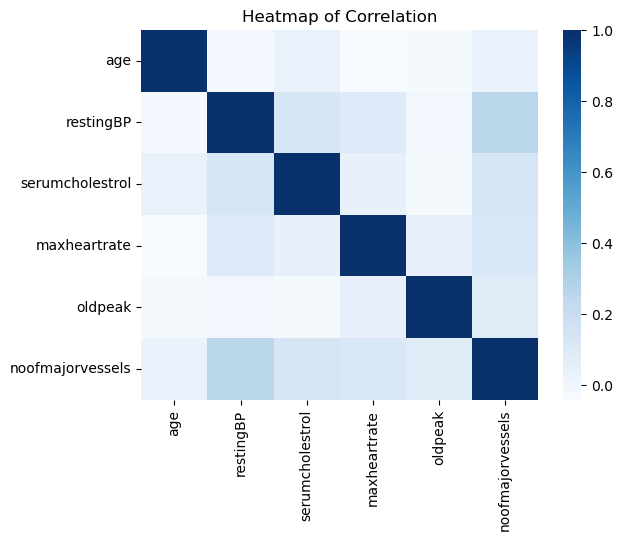

In [34]:
#visualisasi korelasi
sns.heatmap(korelasi, cmap='Blues')
plt.title('Heatmap of Correlation')

Di sini kami melakukan replace data untuk beberapa variabel kategorik yang akan kami gunakan dalam visualisasi data, agar mempermudah dalam memahaminya.

In [257]:
data = data.replace({'target': {0 :'No Heart Disease', 1 :'Heart Disease'}})
data = data.replace({'slope': {0 :'normal', 1 :'up-sloping', 2:'flat', 3:'down-sloping'}})
data = data.replace({'chestpain': {0 :'typical angina', 1 :'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'}})
data = data.replace({'fastingbloodsugar': {0 :'<=120mg/dl', 1 :'>120mg/dl'}})
data = data.replace({'restingelectro': {0 :'normal', 1 :'ST-T wave abnormality', 2:'probable or definite left ventricular hypertrophy'}})
data = data.replace({'exerciseangia': {0 :'No', 1 :'Yes'}})
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53.0,Male,non-anginal pain,171.0,0.0,<=120mg/dl,ST-T wave abnormality,147.0,No,5.3,down-sloping,3.0,Heart Disease
1,119250,40.0,Male,typical angina,94.0,229.0,<=120mg/dl,ST-T wave abnormality,115.0,No,3.7,up-sloping,1.0,No Heart Disease
2,119372,49.0,Male,non-anginal pain,133.0,142.0,<=120mg/dl,Normal,202.0,Yes,5.0,up-sloping,0.0,No Heart Disease
3,132514,43.0,Male,typical angina,138.0,295.0,>120mg/dl,ST-T wave abnormality,153.0,No,3.2,flat-sloping,2.0,Heart Disease
4,146211,31.0,Male,atypical angina,199.0,0.0,<=120mg/dl,probable or definite left ventricular hypertrophy,136.0,No,5.3,down-sloping,2.0,Heart Disease


# Data Visualization

Text(0.5, 1.0, 'Distribution of Heart Disease Presence')

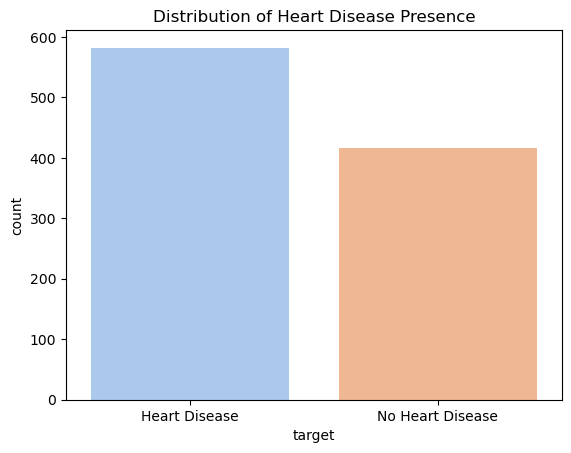

In [272]:
#visualisasi data untuk mengetahui penyebaran target heart disease
sns.countplot(x='target', data=data, palette='pastel')
plt.title('Distribution of Heart Disease Presence')

Text(0.5, 1.0, 'Distribution of Gender')

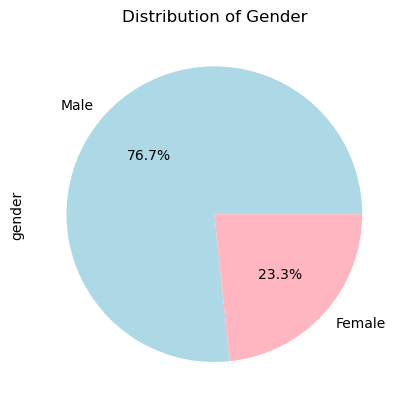

In [274]:
#visualisasi data untuk mengetahui penyebaran gender
data['gender'].value_counts().plot(kind='pie', colors=['lightblue', 'lightpink'], autopct='%1.1f%%')
plt.title("Distribution of Gender")

Text(0, 0.5, 'Count')

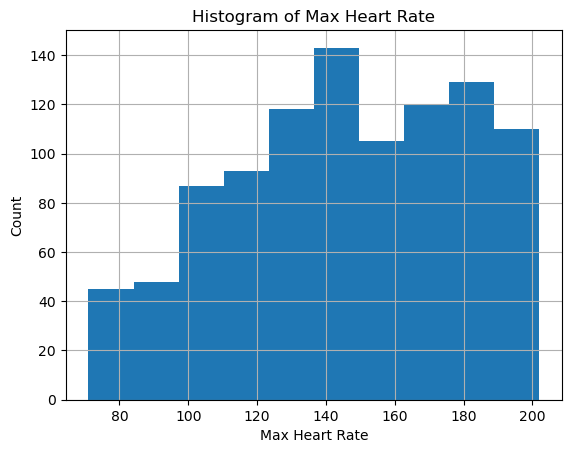

In [275]:
#visualisasi data untuk mengetahui penyebaran max heart rate
data['maxheartrate'].hist()
plt.title("Histogram of Max Heart Rate")
plt.xlabel('Max Heart Rate')
plt.ylabel('Count')

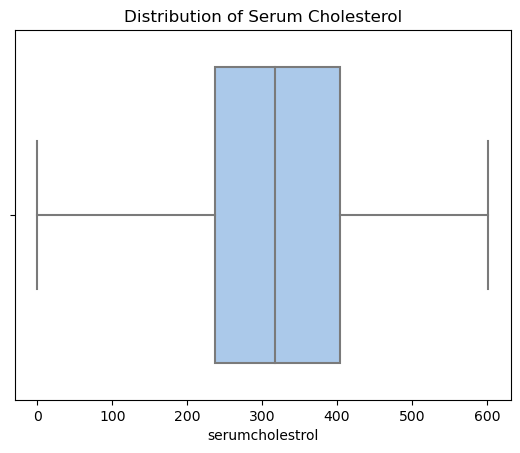

In [238]:
#visualisasi data untuk mengetahui penyebaran serum cholestrol
sns.boxplot(x='serumcholestrol', data=data, palette='pastel')
plt.title('Distribution of Serum Cholesterol')
plt.show()

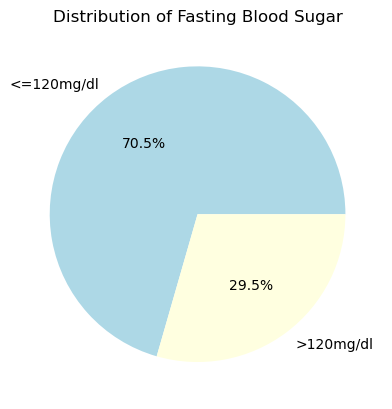

In [263]:
#visualisasi data untuk mengetahui penyebaran fasting blood sugar
plt.pie(data['fastingbloodsugar'].value_counts(), labels=['<=120mg/dl', '>120mg/dl'], colors=['lightblue','lightyellow'], autopct='%1.1f%%')
plt.title("Distribution of Fasting Blood Sugar")
plt.show()

Text(0.5, 1.0, 'Distribution of Exercise Induced Angia')

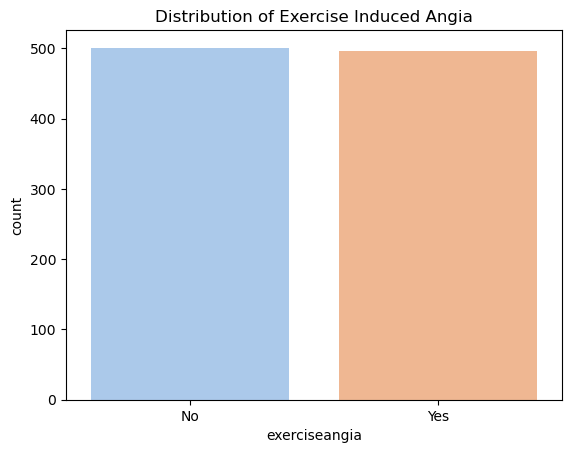

In [265]:
#visualisasi data untuk mengetahui penyebaran exercise angia
sns.countplot(x='exerciseangia', data=data, palette='pastel')
plt.title('Distribution of Exercise Induced Angia')

Text(0.5, 1.0, 'Distribution of Resting Electrocardiogram Results')

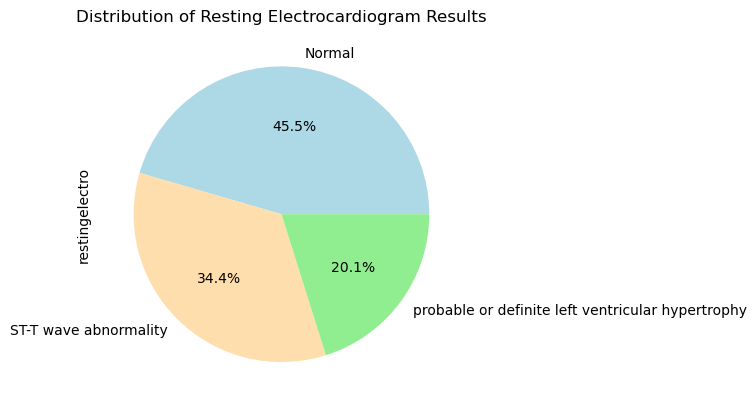

In [281]:
#visualisasi data untuk mengetahui penyebaran resting electro
data['restingelectro'].value_counts().plot(kind='pie', colors=['lightblue','navajowhite','lightgreen'], autopct='%1.1f%%')
plt.title('Distribution of Resting Electrocardiogram Results')

Text(0.5, 1.0, 'Age Distribution by Heart Disease Presence')

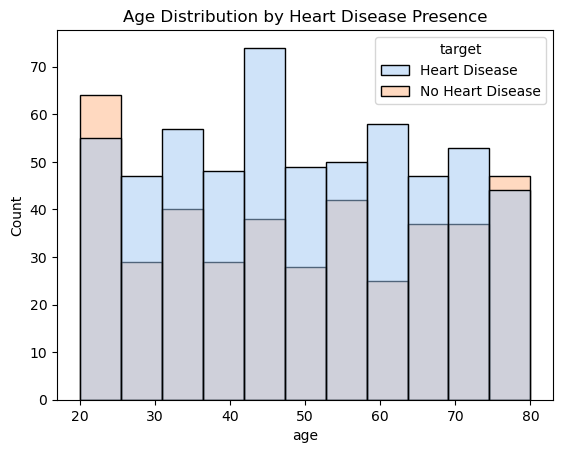

In [286]:
#visualisasi data untuk mengetahui penyebaran age berdasarkan target heart disase
sns.histplot(x='age', hue='target', data=data, palette='pastel')
plt.title("Age Distribution by Heart Disease Presence")

Text(0.5, 1.0, 'Heart Disease Presence by Chest Pain Type')

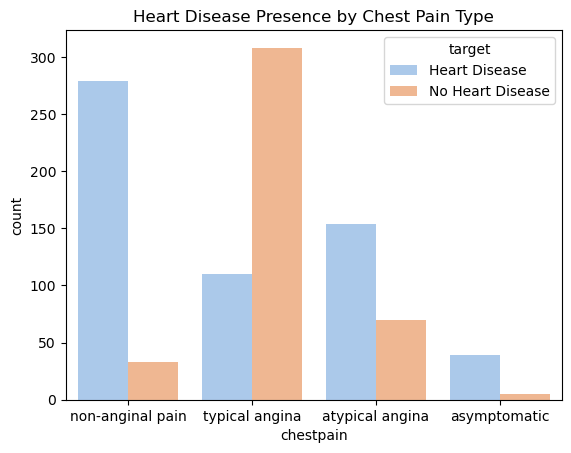

In [270]:
#visualisasi data untuk mengetahui penyebaran target heart disease berdasarkan chest pain type
sns.countplot(x='chestpain', hue='target', data=data, palette='pastel')
plt.title('Heart Disease Presence by Chest Pain Type')

Text(0.5, 1.0, 'Heart Disease Presence by Fasting Blood Sugar')

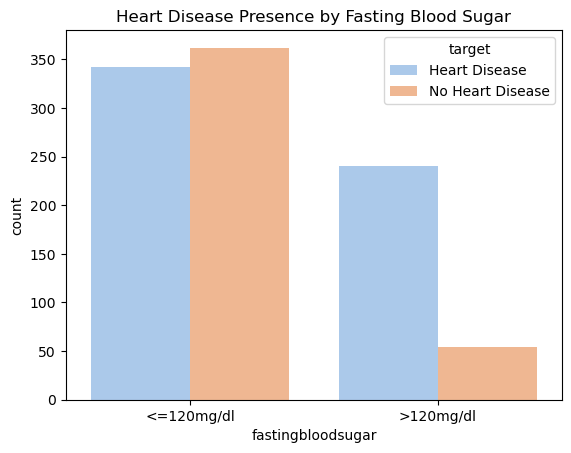

In [287]:
#visualisasi data untuk mengetahui penyebaran target heart disease berdasarkan fasting blood sugar
sns.countplot(x='fastingbloodsugar', hue='target', data=data, palette='pastel')
plt.title("Heart Disease Presence by Fasting Blood Sugar")

Text(0.5, 1.0, 'Heart Disease Presence by No. of Major Vessels')

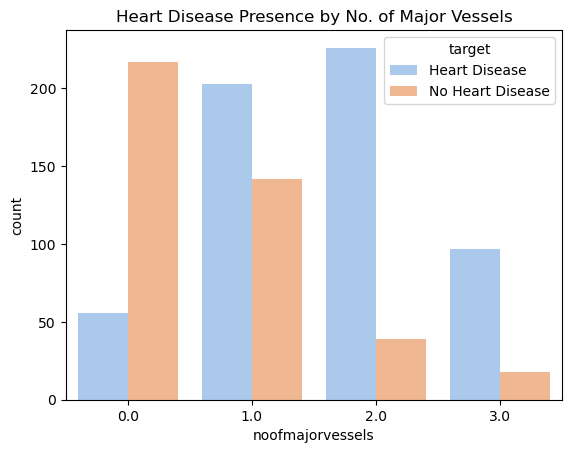

In [320]:
#visualisasi data untuk mengetahui penyebaran target heart disease berdasarkan No. of Major Vessels
sns.countplot(data=data, x='noofmajorvessels', hue='target', palette='pastel')
plt.title("Heart Disease Presence by No. of Major Vessels")

Text(0.5, 1.0, 'Scatter Plot between Max Heart Rate and Resting BP')

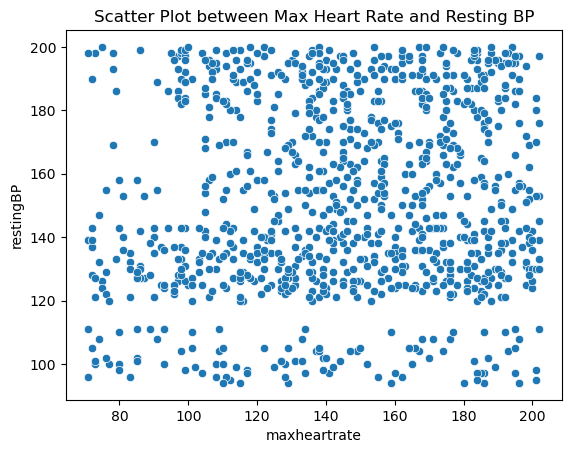

In [312]:
#visualisasi data untuk mengetahui hubungan antara Max Heart Rate dan Resting BP
sns.scatterplot(data=data, x='maxheartrate', y='restingBP')
plt.title("Scatter Plot between Max Heart Rate and Resting BP")

Text(0.5, 1.0, 'Heart Disease Presence by Slope')

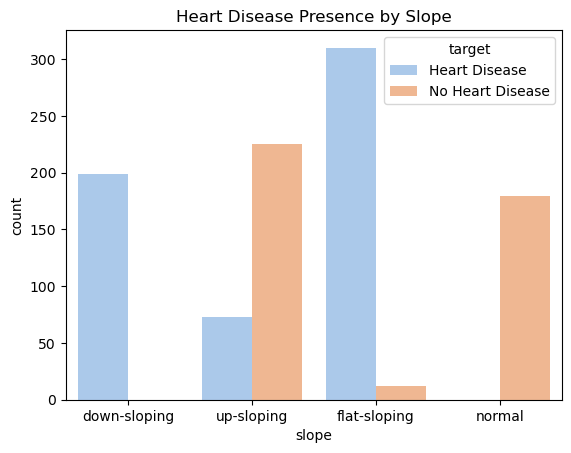

In [289]:
#visualisasi data untuk mengetahui penyebaran target heart disease berdasarkan slope
sns.countplot(x='slope', hue='target', data=data, palette='pastel')
plt.title("Heart Disease Presence by Slope")

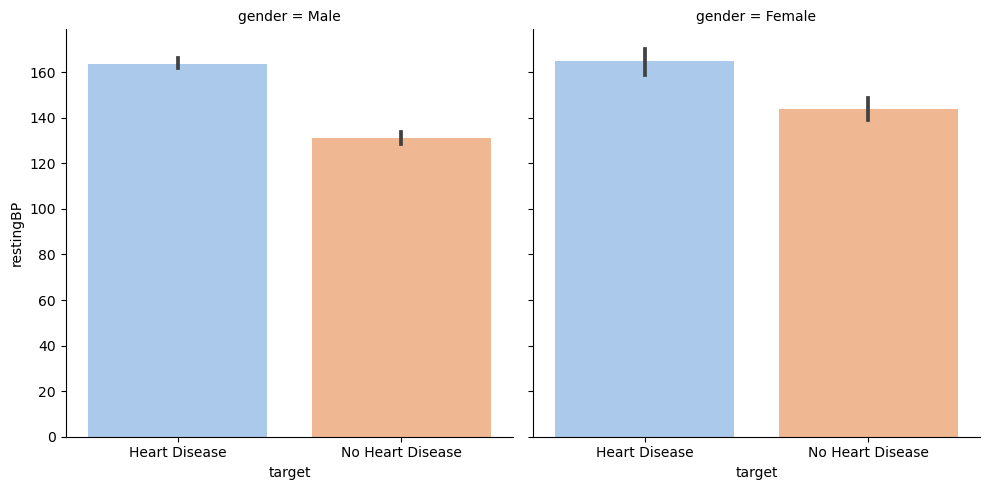

In [313]:
#visualisasi data untuk penyebaran resting BP berdasarkan target heart disease dan gender
sns.catplot(data=data, x="target", y="restingBP", col='gender', kind='bar', palette='pastel')